In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential , load_model
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [7]:
# Load the pre-trained model
model = load_model('/kaggle/input/lstm_txt_gen/keras/default/1/text_generator_model_v1.keras')

In [8]:
# Load the pre-trained tokenizer
with open('/kaggle/input/lstm_txt_gen/keras/default/1/tokenizer.pickle', 'rb') as f:
    tokenizer = pickle.load(f)

In [9]:
# Load and preprocess your new text data
with open('/kaggle/input/text-data/poem.txt', 'r') as f:
    data = f.read()

In [10]:
tokenizer.fit_on_texts([data])
total_words = len(tokenizer.word_index) + 1

In [11]:
input_sequences = []
for line in data.split('\n'):
  token_list = tokenizer.texts_to_sequences([line])[0]
  for i in range(1, len(token_list)):
    n_gram_sequence = token_list[:i+1]
    input_sequences.append(n_gram_sequence)

In [12]:
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

In [13]:
x , y = input_sequences[:,:-1] , input_sequences[:,-1]
y = tf.keras.utils.to_categorical(y, num_classes=total_words)

In [14]:
num_classes = y.shape[1]
print("Number of classes:", num_classes)

Number of classes: 11003


In [15]:
model.pop() 
model.add(Dense(num_classes, activation='softmax', name="output_layer"))

In [16]:

# Compile the model with a lower learning rate for fine-tuning
model.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

Epoch 1/30
483/483 ━━━━━━━━━━━━━━━━━━━━ 14s 24ms/step - accuracy: 6.4602e-04 - loss: 9.2943 - val_accuracy: 0.0025 - val_loss: 9.2303
Epoch 2/30
483/483 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.0030 - loss: 9.2091 - val_accuracy: 0.0064 - val_loss: 9.1430
Epoch 3/30
483/483 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.0068 - loss: 9.1210 - val_accuracy: 0.0106 - val_loss: 9.0518
Epoch 4/30
483/483 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.0111 - loss: 9.0298 - val_accuracy: 0.0139 - val_loss: 8.9549
Epoch 5/30
483/483 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.0144 - loss: 8.9302 - val_accuracy: 0.0166 - val_loss: 8.8517
Epoch 6/30
483/483 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.0175 - loss: 8.8253 - val_accuracy: 0.0175 - val_loss: 8.7428
Epoch 7/30
483/483 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.0184 - loss: 8.7160 - val_accuracy: 0.0191 - val_loss: 8.6287
Epoch 8/30
483/483 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.0196 - loss: 8.5997 - va

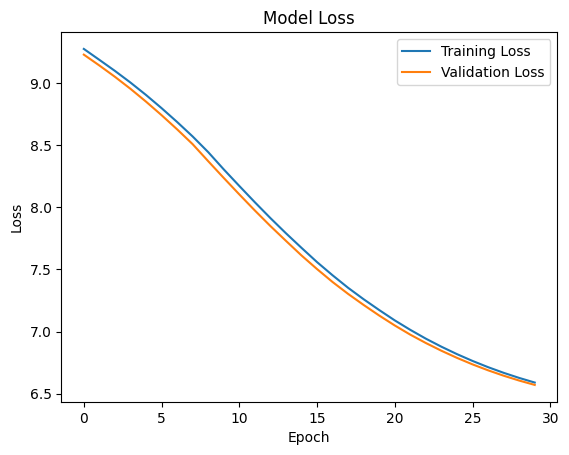

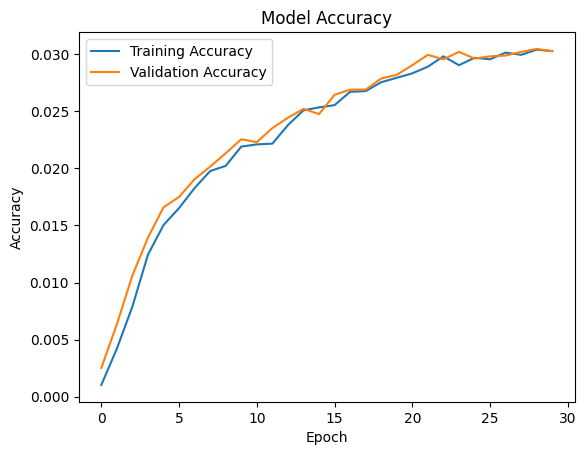

In [17]:
# Train the model and store the history
history = model.fit( x , y , epochs=30 , validation_data=(x , y))

# Plot training & validation loss values
plt.plot(history.history['loss'], label='Training Loss')
if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'], label='Validation Loss')

plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training & validation accuracy values if available
if 'accuracy' in history.history:
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    if 'val_accuracy' in history.history:
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

In [18]:
# Save the fine-tuned model
model.save('/kaggle/working/text_generator_finetuned.keras')


In [19]:
with open ('/kaggle/working/tokenizer2.pickle' , 'wb') as f:
  pickle.dump(tokenizer , f )

In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 1398, 64)       │       604,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 11003)          │       715,195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,057,907 (15.48 MB)

 Trainable params: 1,352,635 (5.16 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,705,272 (10.32 MB)